In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


from statsmodels.tsa.stattools import adfuller

In [3]:
atlantic_unemploy = pd.read_csv('./data/Atlantic_city_data/unemployment_nonseaonal.csv')
boston_unemploy = pd.read_csv('./data/Boston/unemployment_nonseasonal.csv')
bridgeport_unemploy = pd.read_csv('./data/bridgeport_data/unemployment_nonseasonal.csv')
new_haven_unemploy = pd.read_csv('./data/new_haven_data/unemployment_nonseasonal.csv')
new_london_unemploy = pd.read_csv('./data/new_london_data/unemployment_nonseasonal.csv')
newport_unemploy = pd.read_csv('./data/newport/unemployment_nonseasonal.csv')
baltimore_unemploy = pd.read_csv('./data/baltimore_data/unemployment_nonseasonal.csv')
ocean_city_unemploy = pd.read_csv('./data/ocean_city/unemployment_nonseasonal.csv')
portland_unemploy = pd.read_csv('./data/portland/unemployment_nonseasonal.csv')
providence_unemploy = pd.read_csv('./data/providence/unemployment_nonseasonal.csv')

In [4]:
atlantic_unemploy.index = pd.to_datetime(atlantic_unemploy["DATE"])
atlantic_unemploy.drop(columns = ["DATE"], inplace=True)

baltimore_unemploy.index = pd.to_datetime(baltimore_unemploy["DATE"])
baltimore_unemploy.drop(columns = ["DATE"], inplace=True)

boston_unemploy.index = pd.to_datetime(boston_unemploy["DATE"])
boston_unemploy.drop(columns = ["DATE"], inplace=True)

bridgeport_unemploy.index = pd.to_datetime(bridgeport_unemploy["DATE"])
bridgeport_unemploy.drop(columns = ["DATE"], inplace=True)

In [5]:
atlantic_unemploy["ATLA134URN"][16:30]

DATE
2011-05-01    12.3
2011-06-01    12.2
2011-07-01    12.2
2011-08-01    11.6
2011-09-01    11.8
2011-10-01    12.0
2011-11-01    11.9
2011-12-01    12.6
2012-01-01    13.6
2012-02-01    13.6
2012-03-01    13.0
2012-04-01    12.1
2012-05-01    12.3
2012-06-01    12.2
Name: ATLA134URN, dtype: float64

/anaconda3/envs/dsi/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


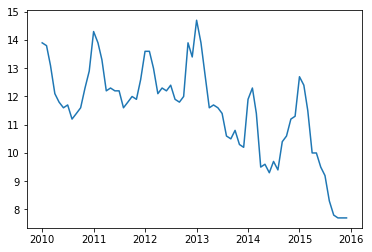

In [6]:
plt.plot(atlantic_unemploy);

In [7]:
# Code written by Joseph Nelson.

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [8]:

# Write a for loop to find the lowest difference value d.

# Iterate through all possible differences.
for d in range(1, len(atlantic_unemploy)):
    
    # Print out a counter and the corresponding p-value.
    print(f'Checking difference of {d}.')
    print(f'p-value = {interpret_dftest(adfuller(atlantic_unemploy["ATLA134URN"].diff(d).dropna()))["p-value"]}.')
          
    # If our data, differenced by d time periods, are stationary, print that out!
    if interpret_dftest(adfuller(atlantic_unemploy['ATLA134URN'].diff(d).dropna()))['p-value'] < 0.05:
        print(f'Differencing our time series by d={d} yields a stationary time series!')
        break
    
    print()

Checking difference of 1.
p-value = 0.5028682621558089.

Checking difference of 2.
p-value = 0.5051096244919152.

Checking difference of 3.
p-value = 0.5199989167140712.

Checking difference of 4.
p-value = 0.49173570830050534.

Checking difference of 5.
p-value = 0.6900010544847882.

Checking difference of 6.
p-value = 0.5661506034794311.

Checking difference of 7.
p-value = 0.44747266850203266.

Checking difference of 8.
p-value = 0.3505000929083433.

Checking difference of 9.
p-value = 0.38791967754480394.

Checking difference of 10.
p-value = 0.29277753769235665.

Checking difference of 11.
p-value = 0.05113802194187573.

Checking difference of 12.
p-value = 0.6449832665816815.

Checking difference of 13.
p-value = 0.05808514295501104.

Checking difference of 14.
p-value = 0.5105144496168847.

Checking difference of 15.
p-value = 0.5780330935560211.

Checking difference of 16.
p-value = 0.5603268702583305.

Checking difference of 17.
p-value = 0.11782621875294752.

Checking differe

In [9]:
atlantic_unemploy

,ATLA134URN
DATE,
2010-01-01,13.9
2010-02-01,13.8
2010-03-01,13.1
2010-04-01,12.1
2010-05-01,11.8
2010-06-01,11.6
2010-07-01,11.7
2010-08-01,11.2
2010-09-01,11.4


In [12]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [20]:
def plot_unemployment(df, city):

    model = SARIMAX(endog = df.dropna(), # endog = Y variable
                  order = (0,1,1), seasonal_order=(0, 1, 1, 12), enforce_invertibility=False) # (p, d, q) <-- talk about q later!

    model_fit = model.fit()
    y_hat = model_fit.predict()
              
    plt.figure(figsize = (25, 15)) 
    plt.title(f"{city}", fontsize=60, pad=20)
    plt.xticks(fontsize = 40)
    plt.yticks(fontsize = 40)
    plt.ylabel("Unemployment Rate", fontsize = 40, labelpad=20)
    plt.tight_layout()
    plt.plot(y_hat, linewidth = 6);

/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


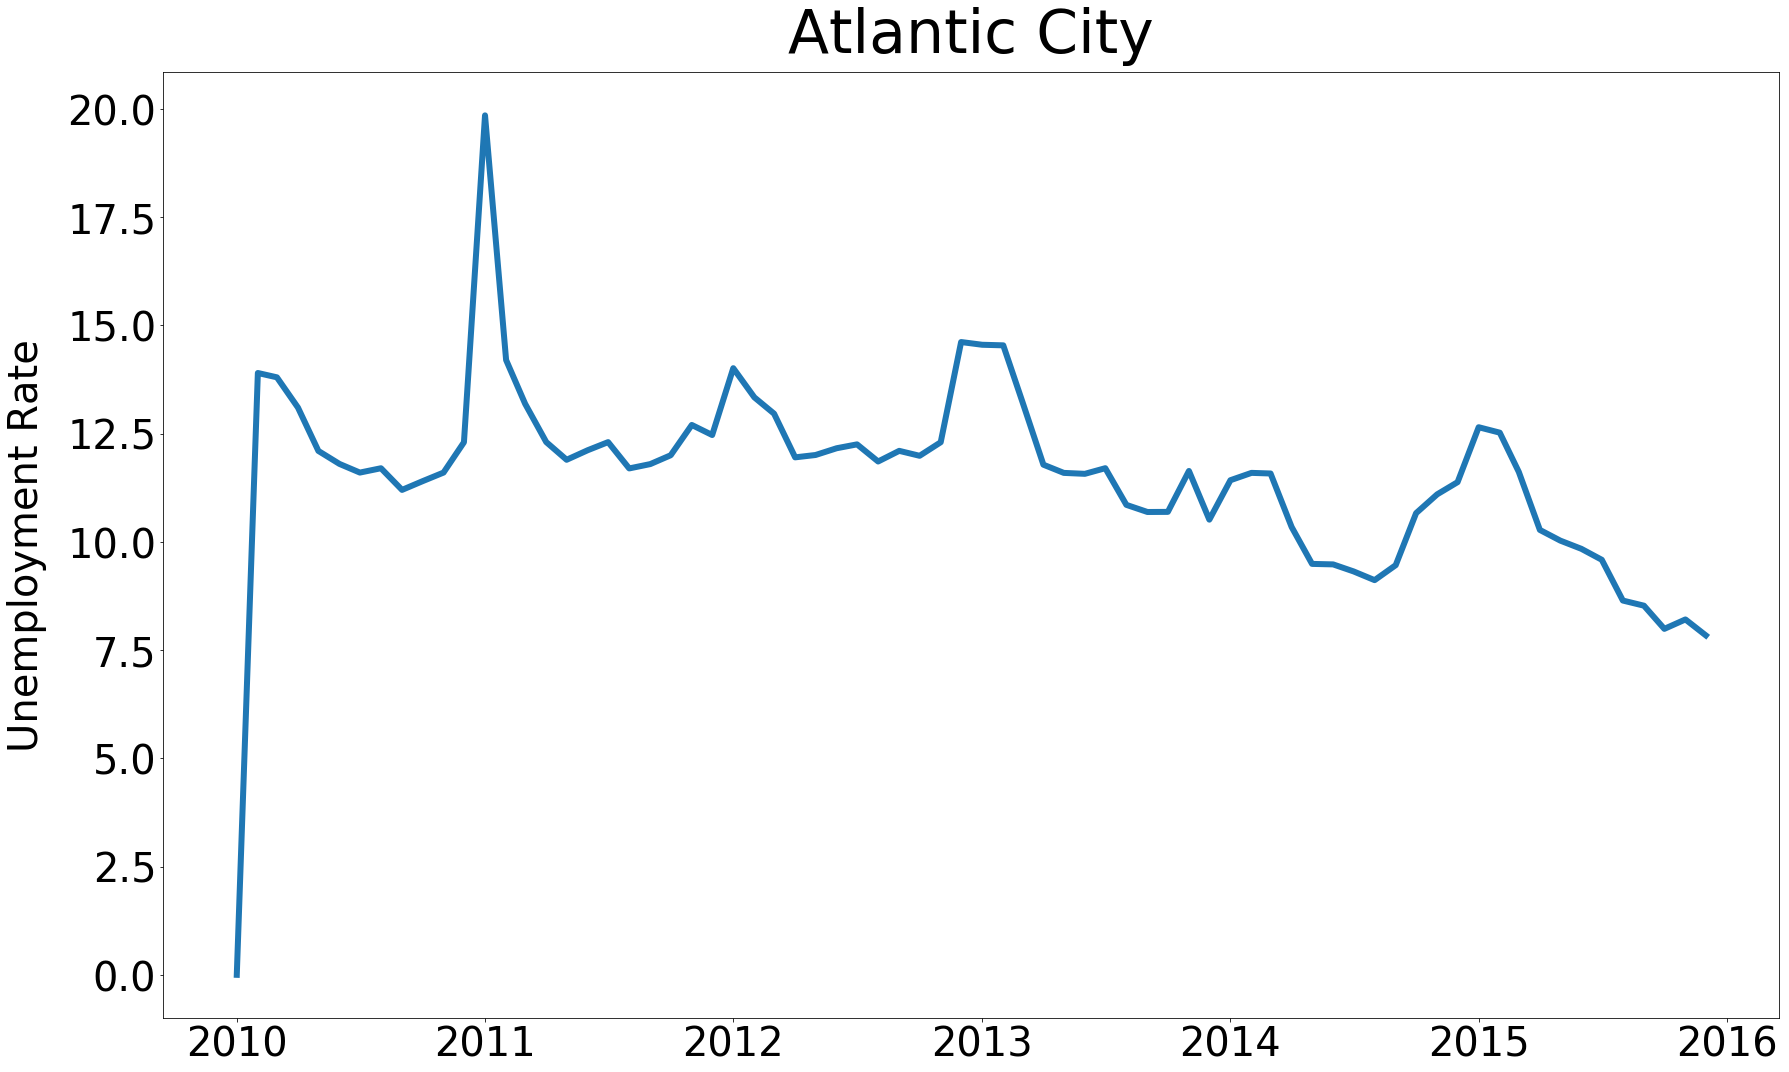

In [21]:
plot_unemployment(atlantic_unemploy, "Atlantic City")

/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


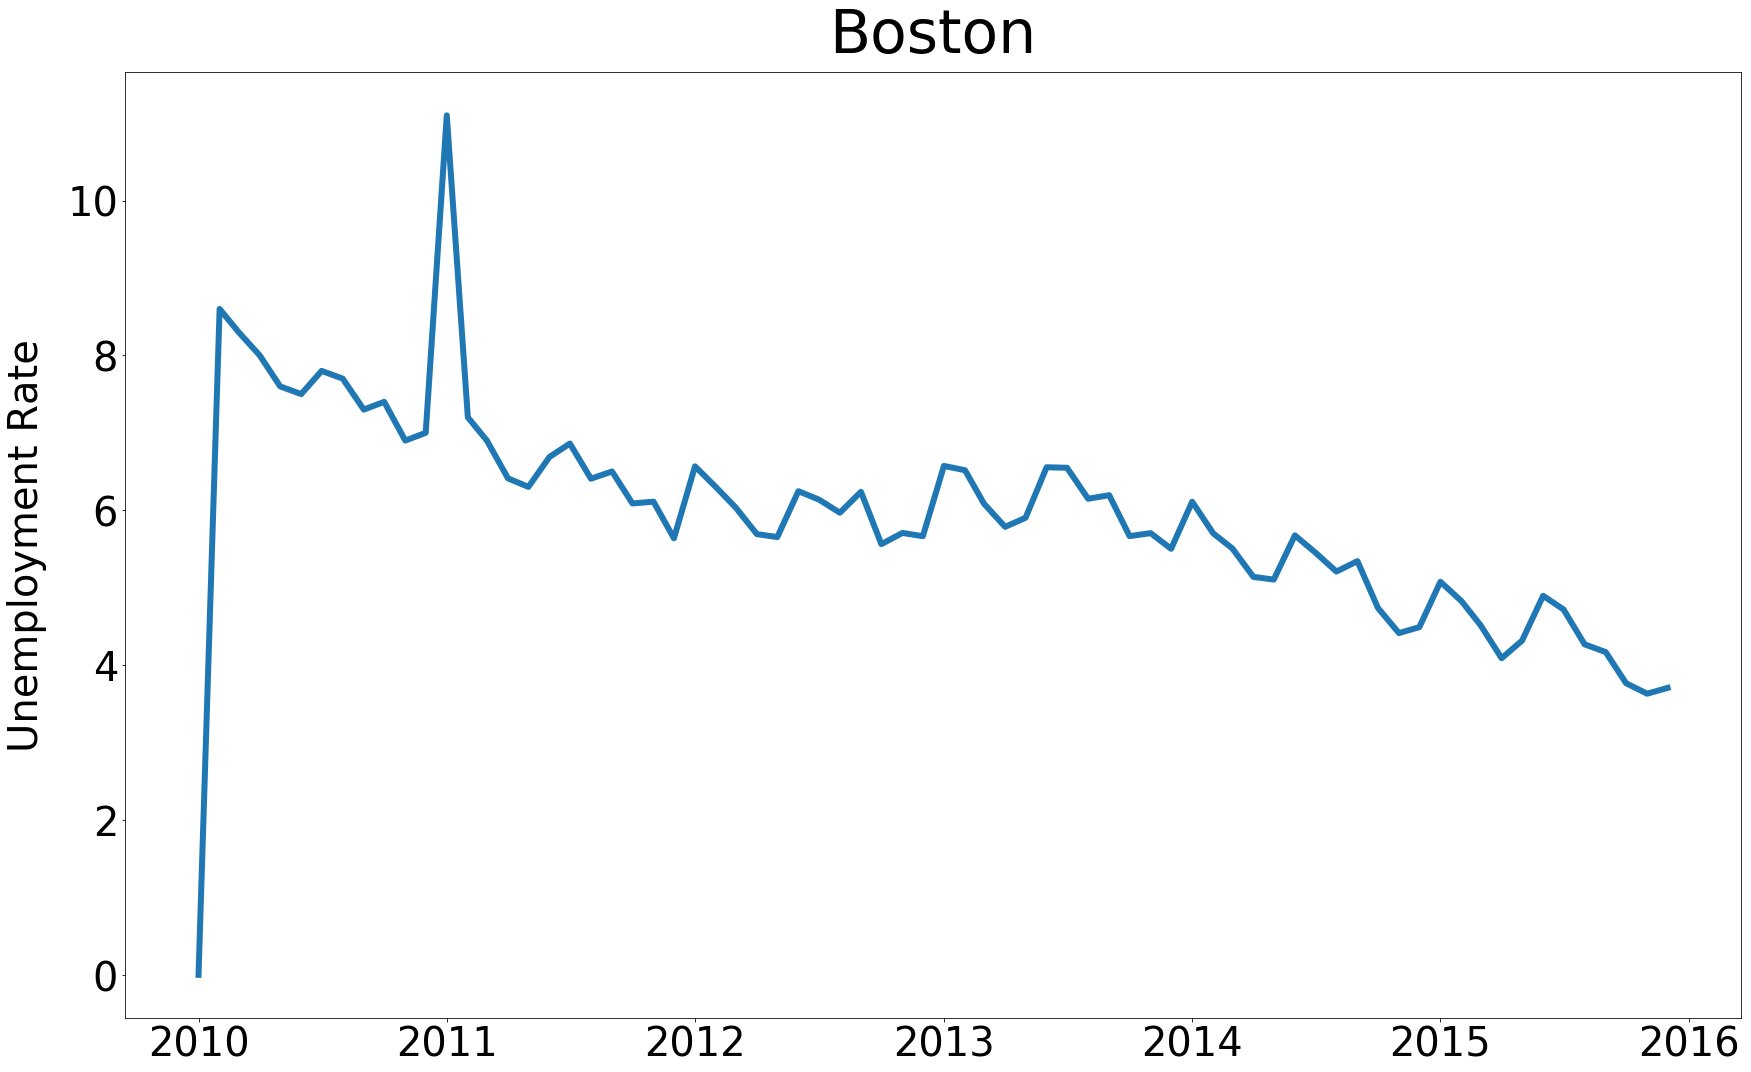

In [22]:
plot_unemployment(boston_unemploy, "Boston")

/anaconda3/envs/dsi/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


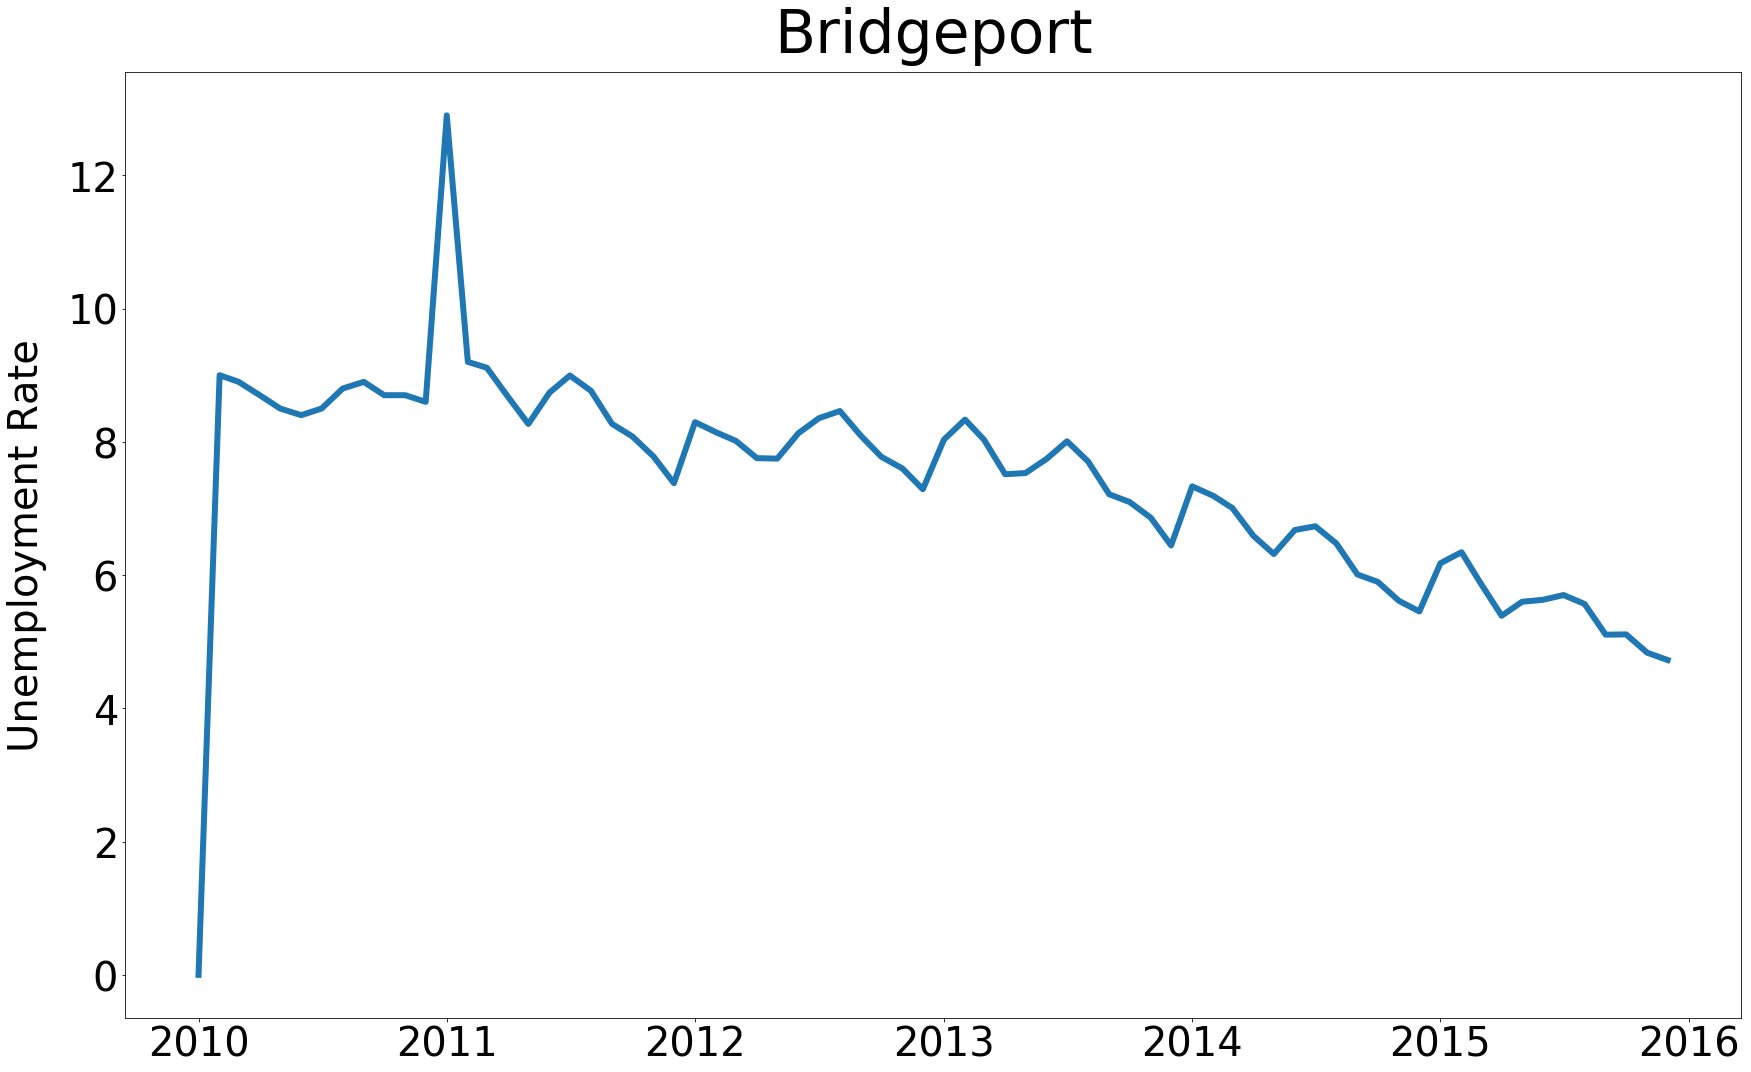

In [23]:
plot_unemployment(bridgeport_unemploy, "Bridgeport")

In [ ]:
plot_unemployment(bridgeport_unemploy, "Bridgeport")